# 1D Schrödinger Equation Solver Using Finite Difference Method

## 1. Introduction

In this notebook, we solve the **1D Schrödinger equation** for a particle confined
 in a potential well using a finite-difference approach. The time-independent Schrödinger equation is given by:

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + U(x)\psi(x) = E\psi(x)
$$

where:
- **$\psi(x)$** is the wavefunction,
- **$U(x)$** is the potential energy,
- **$E$** is the energy eigenvalue,
- **$\hbar$** is the reduced Planck constant,
- **$m$** is the mass of the particle.

By discretizing space into a uniform grid and approximating the second derivative with finite differences, we convert the differential equation into a matrix eigenvalue problem. Solving this eigenvalue problem provides the energy eigenvalues and corresponding eigenfunctions.

## 2. What This Notebook Covers
1. **Defining Physical Constants & Setting Up the Grid:** We set the constants (such as $\hbar$ and $m$) and create a uniform spatial grid.
2. **Constructing the Hamiltonian Matrix:** Using finite differences, we build the Hamiltonian operator as a tridiagonal matrix.
3. **Defining the Potential Energy:** We set up a "particle in a box" potential where the potential is zero inside the well and elevated outside.
4. **Solving the Eigenvalue Problem:** We compute the eigenvalues and eigenvectors of the Hamiltonian.
5. **Visualization:** We plot the potential profile and the probability densities (squared wavefunctions) of the ground and first excited states.

## 3. User Customization
- **Physical constants:** Modify values for $\hbar$, $m$, etc.
- **Grid resolution:** Adjust the domain size and number of grid points (`Np`).
- **Potential energy function:** Change the form or parameters of $U(x)$. 

To begin let us import the required libraries, define our constants and generate the associated discretized grid.

In [22]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Physical Constants
hbar = 1.055e-34  # Reduced Planck constant (J·s)
q = 1.602e-19     # Elementary charge (C) - used to convert energy to eV
m = 9.1e-31       # Mass of the electron (kg)

# Setup the spatial grid
Np = 100            # Number of grid points
a = 1e-10           # Grid spacing (m)
# Create a grid and convert distances to nm for plotting purposes
X = a * np.linspace(1, Np, Np) / 1e-9  # in nm

### Finite-Difference Discretization

Now we set up our discretization as such. For a uniform grid with spacing \(a\), the second derivative at grid point \(x_j\) is approximated by:

$$
\frac{d^2\psi}{dx^2}\Big|_{x=x_j} \approx \frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{a^2}.
$$

Multiplying by the kinetic energy coefficient

$$
t_0 = \frac{\hbar^2}{2 m a^2}\quad (\text{converted to eV}),
$$

we obtain the Hamiltonian matrix elements: the main diagonal is given by $2t_0$ and the off-diagonals by $-t_0$.

In [23]:
# Construct the Hamiltonian matrix using a finite-difference approximation for the second derivative

# Kinetic energy coefficient (finite-difference approximation):
t0 = (hbar**2) / (2 * m * a**2) / q  # in eV

# Diagonal elements (on-site energies) and off-diagonal elements (coupling terms)
on = 2.0 * t0 * np.ones(Np)      # Main diagonal
off = -t0 * np.ones(Np - 1)        # Off-diagonals

### Define the "Particle in a Box" Potential

We define the potential $U(x)$ such that:
- **$U(x) = 0$** inside the well,
- **$U(x) = V_0$** outside the well.

The well is bounded by indices $n_1 = 25$ and $n_2 = 75$, corresponding to positions $x_1$ and $x_2$ (in nm). The potential array $U$ is constructed with $V_0$ for $x < x_1$ and $x > x_2$, and $0$ for $x_1 \le x \le x_2$.

In [24]:
# Define the "particle in a box" potential
# The potential is set to zero within the well and V0 outside.
n1 = 25  # Index where the well starts
n2 = 75  # Index where the well ends

# Convert indices to positions (in nm) for reference
x1 = n1 * a / 1e-9  # Left boundary in nm
x2 = n2 * a / 1e-9  # Right boundary in nm
print("Potential well boundaries (nm):", x1, x2)

V0 = 0.5  # eV, potential outside the well

# Build the potential array: V0 for x < x1 and x > x2; 0 for x1 <= x <= x2
U = np.array(V0 * np.ones(n1))
U = np.append(U, np.zeros(n2 - n1))
U = np.append(U, V0 * np.ones(Np - n2))

Potential well boundaries (nm): 2.5 7.500000000000001


### Constructing the Full Hamiltonian and Solving the Eigenvalue Problem

We now build the full Hamiltonian matrix $H = T + U$, where the kinetic energy term $T$ (with main diagonal $2t_0$ and off-diagonals $-t_0$) is combined with the potential energy $U$ (added to the diagonal).

Next, we solve the eigenvalue problem for $H$ to obtain the energy eigenvalues and eigenvectors. The eigenvalues are sorted in ascending order, and we print the first 10 eigenvalues (in eV) and calculate the energy gap between the ground and first excited states.

In [25]:
# Build the full Hamiltonian matrix H = T + U, where T is the kinetic energy term.
# U is added to the diagonal.
H = np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)

# Solve the eigenvalue problem for the Hamiltonian matrix
W, V = np.linalg.eig(H)

# Sort the eigenvalues and corresponding eigenvectors in ascending order
idx = W.argsort()
W = W[idx]
V = V[:, idx]

# Print the first 10 eigenvalues (in eV)
print("First 10 eigenvalues (eV):", W[0:10])

# Calculate the energy gap between the ground and first excited states
Energy_gap = W[1] - W[0]
print("Energy gap between ground and first excited state (eV):", Energy_gap)

First 10 eigenvalues (eV): [0.01216831 0.04852059 0.1085621  0.19130942 0.29483968 0.41440762
 0.52431438 0.55587216 0.58577875 0.673147  ]
Energy gap between ground and first excited state (eV): 0.036352277306740566


### Compute Probability Densities and Visualization

We compute the probability densities for the ground and first excited states by squaring the magnitude of the eigenvectors:
- Ground state: $|\Psi_0|^2 = |V[:,0]|^2$
- First excited state: $|\Psi_1|^2 = |V[:,1]|^2$

Next, we visualize the results:
- The potential energy profile $U(x)$ as a function of distance (nm).
- The probability density of the ground state $|\Psi_0|^2$.
- The probability density of the first excited state $|\Psi_1|^2$.

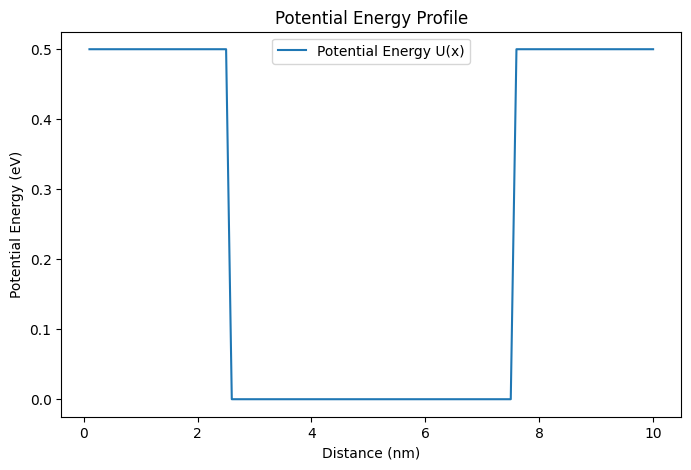

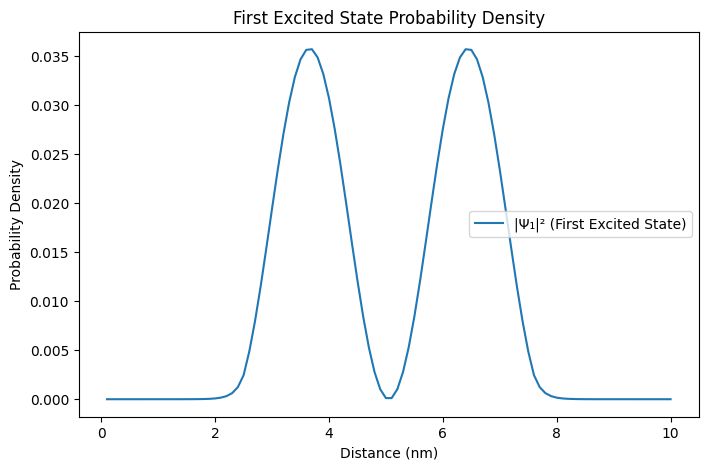

In [26]:
# Compute the probability densities for the ground and first excited states
Psi0 = np.abs(V[:, 0])**2  # Ground state probability density
Psi1 = np.abs(V[:, 1])**2  # First excited state probability density

# Visualize the potential energy profile
plt.figure(figsize=(8, 5))
plt.plot(X, U, label='Potential Energy U(x)')
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.title('Potential Energy Profile')
plt.legend()
plt.show()

# Plot the probability density for the ground  state
plt.figure(figsize=(8, 5))
plt.plot(X, Psi1, label='|Ψ₁|² (First Excited State)')
plt.xlabel('Distance (nm)')
plt.ylabel('Probability Density')
plt.title('First Excited State Probability Density')
plt.legend()
plt.show()

# Plot the probability density for the first excited state
plt.figure(figsize=(8, 5))
plt.plot(X, Psi1, label='|Ψ₁|² (First Excited State)')
plt.xlabel('Distance (nm)')
plt.ylabel('Probability Density')
plt.title('First Excited State Probability Density')
plt.legend()
plt.show()
